# Importing libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# graphs created are displayed within the notebook without the need to call them specifically

%matplotlib inline

In [3]:
# establish path

path = path = r'/Users/martyna/Documents/CF Data Analysis/Data Immersion/Achievement 6/COVID Analysis 8.22'

In [4]:
# import data 

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data','covid_merged.csv'), index_col = False)

# Cleaning data

In [5]:
df.columns

Index(['Unnamed: 0', 'county', 'state', 'county_population',
       'covid_inpatient_bed_utilization', 'covid_hospital_admissions_per_100k',
       'covid_cases_per_100k', 'covid-19_community_level', 'date_updated',
       'total_doses_given', 'doses_per_100k', 'percent_with_at_least_one_dose',
       'people_fully_vaccinated', 'percent_fully_vaccinated', 'total_cases',
       'case_rate_per_100k', 'total_deaths', 'death_rate_per_100k',
       'total_percent_positive'],
      dtype='object')

In [6]:
df.head(20)

,Unnamed: 0,county,state,county_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated,total_doses_given,doses_per_100k,percent_with_at_least_one_dose,people_fully_vaccinated,percent_fully_vaccinated,total_cases,case_rate_per_100k,total_deaths,death_rate_per_100k,total_percent_positive
0,0,American Samoa,American Samoa,47392.0,0.0,2.1,156.14,Low,3/3/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
1,1,American Samoa,American Samoa,47392.0,0.9,19.0,434.67,High,3/10/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
2,2,American Samoa,American Samoa,47392.0,1.0,6.3,901.00,Medium,3/17/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
3,3,American Samoa,American Samoa,47392.0,10.4,0.0,1093.01,High,4/14/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
4,4,American Samoa,American Samoa,47392.0,4.1,80.2,267.98,High,4/21/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
5,5,American Samoa,American Samoa,47392.0,4.7,10.6,324.95,High,4/28/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
6,6,American Samoa,American Samoa,47392.0,2.1,2.1,118.16,Low,5/5/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
7,7,American Samoa,American Samoa,47392.0,1.8,0.0,248.99,Medium,5/12/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
8,8,American Samoa,American Samoa,47392.0,2.8,19.0,3143.99,High,3/31/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
9,9,American Samoa,American Samoa,47392.0,1.6,25.3,2561.61,high,3/24/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN


In [7]:
df.drop(['Unnamed: 0'], axis=1)

,county,state,county_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated,total_doses_given,doses_per_100k,percent_with_at_least_one_dose,people_fully_vaccinated,percent_fully_vaccinated,total_cases,case_rate_per_100k,total_deaths,death_rate_per_100k,total_percent_positive
0,American Samoa,American Samoa,47392.0,0.0,2.1,156.14,Low,3/3/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
1,American Samoa,American Samoa,47392.0,0.9,19.0,434.67,High,3/10/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
2,American Samoa,American Samoa,47392.0,1.0,6.3,901.00,Medium,3/17/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
3,American Samoa,American Samoa,47392.0,10.4,0.0,1093.01,High,4/14/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
4,American Samoa,American Samoa,47392.0,4.1,80.2,267.98,High,4/21/22,123210,259981.0,95.0,42156,89.0,8042.0,16969.0,33.0,69.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78997,Matanuska-Susitna Borough,Alaska,108317.0,4.5,13.0,198.49,Medium,8/11/22,1732765,236864.0,71.3,462264,63.2,275542.0,37666.0,1296.0,177.0,5-7.9%
78998,Nome CA,Alaska,10004.0,4.5,13.0,349.86,High,8/11/22,1732765,236864.0,71.3,462264,63.2,275542.0,37666.0,1296.0,177.0,5-7.9%
78999,North Slope Borough,Alaska,9832.0,4.5,13.0,284.78,High,8/11/22,1732765,236864.0,71.3,462264,63.2,275542.0,37666.0,1296.0,177.0,5-7.9%
79000,Prince of Wales-Hyder CA,Alaska,6203.0,0.0,0.0,96.73,Low,8/11/22,1732765,236864.0,71.3,462264,63.2,275542.0,37666.0,1296.0,177.0,5-7.9%


In [8]:
# check for missing values

df.isnull().sum()

Unnamed: 0                               0
county                                   0
state                                    0
county_population                        4
covid_inpatient_bed_utilization        140
covid_hospital_admissions_per_100k      27
covid_cases_per_100k                     0
covid-19_community_level                24
date_updated                             0
total_doses_given                        0
doses_per_100k                           0
percent_with_at_least_one_dose           0
people_fully_vaccinated                  0
percent_fully_vaccinated                 0
total_cases                              0
case_rate_per_100k                       0
total_deaths                             0
death_rate_per_100k                      0
total_percent_positive                9599
dtype: int64

Not planning on using columns with missing values for analysis, can disregard.

In [9]:
# check for duplicate values

dups = df.duplicated()

In [10]:
dups.shape

(79002,)

no duplicates

/Users/martyna/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='death_rate_per_100k', ylabel='Density'>

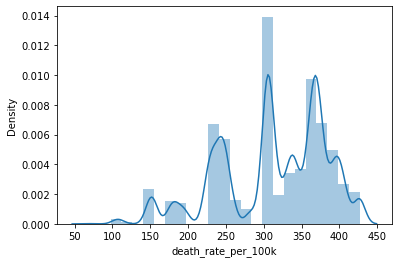

In [11]:
# check for extreme values

sns.distplot(df['death_rate_per_100k'], bins=25) 

In [12]:
# check the mean

df['death_rate_per_100k'].mean() 

313.61340219234955

In [13]:
# check the median

df['death_rate_per_100k'].median() 

322.0

In [14]:
# check the max

df['death_rate_per_100k'].max()

427.0

# Data preparation for regression analysis

### Doses per 100k vs Death Rate per 100k

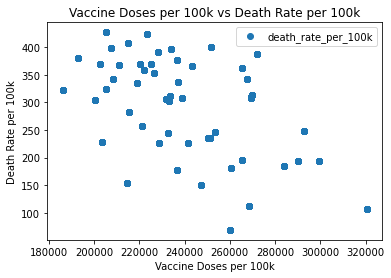

In [15]:
# create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df.plot(x = 'doses_per_100k', y='death_rate_per_100k',style='o')
plt.title('Vaccine Doses per 100k vs Death Rate per 100k')  
plt.xlabel('Vaccine Doses per 100k')  
plt.ylabel('Death Rate per 100k')  
plt.show()

#### Hypothesis: The higher the vaccination rate, the lower the death rate

### Doses per 100k vs COVID-19 Cases per 100k

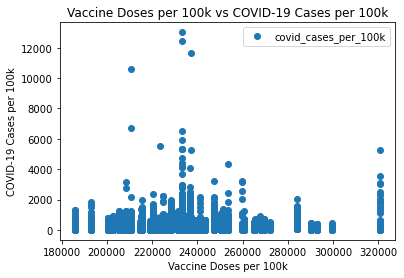

In [16]:
df.plot(x = 'doses_per_100k', y='covid_cases_per_100k',style='o')
plt.title('Vaccine Doses per 100k vs COVID-19 Cases per 100k')  
plt.xlabel('Vaccine Doses per 100k')  
plt.ylabel('COVID-19 Cases per 100k')  
plt.show()

### Doses per 100k vs Case Rate per 100k

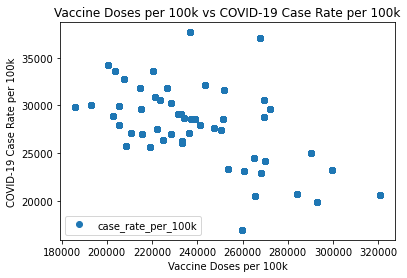

In [17]:
df.plot(x = 'doses_per_100k', y='case_rate_per_100k',style='o')
plt.title('Vaccine Doses per 100k vs COVID-19 Case Rate per 100k')  
plt.xlabel('Vaccine Doses per 100k')  
plt.ylabel('COVID-19 Case Rate per 100k')  
plt.show()

#### Hypothesis: The higher the vaccination rate, the lower the case rate

In [18]:
# reshape the variables into NumPy arrays and put them into separate objects

X = df['doses_per_100k'].values.reshape(-1,1)
y = df['death_rate_per_100k'].values.reshape(-1,1)

In [19]:
X

array([[259981.],
       [259981.],
       [259981.],
       ...,
       [236864.],
       [236864.],
       [236864.]])

In [20]:
y

array([[ 69.],
       [ 69.],
       [ 69.],
       ...,
       [177.],
       [177.],
       [177.]])

In [21]:
# split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
# reshape the variables into NumPy arrays and put them into separate objects

X2 = df['doses_per_100k'].values.reshape(-1,1)
y2 = df['case_rate_per_100k'].values.reshape(-1,1)

In [23]:
X2

array([[259981.],
       [259981.],
       [259981.],
       ...,
       [236864.],
       [236864.],
       [236864.]])

In [24]:
y2

array([[16969.],
       [16969.],
       [16969.],
       ...,
       [37666.],
       [37666.],
       [37666.]])

In [25]:
# split data into a training set and a test set

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

# Regression analysis

## Doses per 100k vs Death Rate per 100k

In [26]:
# create a regression object

regression = LinearRegression()

In [27]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# predict the values of y using X

y_predicted = regression.predict(X_test)

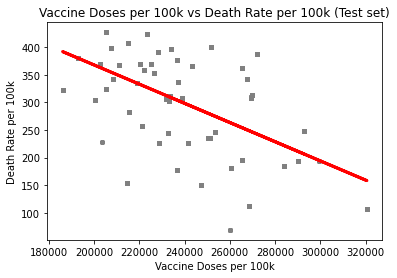

In [29]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Vaccine Doses per 100k vs Death Rate per 100k (Test set)')
plot_test.xlabel('Vaccine Doses per 100k')
plot_test.ylabel('Death Rate per 100k')
plot_test.show()

In [30]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [31]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00173771]]
Mean squared error:  3742.7788809142653
R2 score:  0.2534962399637237


The slope is negative, so the relationship is negative. This aligns with my hypothesis that increasing the vaccination dose rate with decrease the deaths from COVID-19. The MSE is high at 3742, so the regression line is not an exact representation of the data. The R2 score of 0.25 represents a poor fit. 

In [32]:
y_predicted

array([[206.59389956],
       [310.07810228],
       [358.64714221],
       ...,
       [285.50338447],
       [311.14505721],
       [310.07810228]])

In [33]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,249.0,206.593900
1,303.0,310.078102
2,427.0,358.647142
3,181.0,262.384869
4,305.0,366.783108
5,398.0,354.612176
6,257.0,331.123528
7,370.0,324.292583
8,401.0,277.728863
9,380.0,380.139160


In [34]:
# predict

y_predicted_train = regression.predict(X_train) 

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00173771]]
Mean squared error:  3694.793816503886
R2 score:  0.2486471659426418


The values are almost identical to the model, meaning the model was not overdone. The conclusion is that the vaccination rate has a mild effect on the COVID-19 cases, but not enough to coorelate in this analysis.

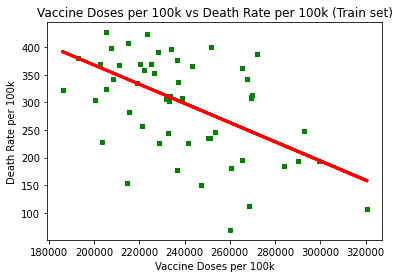

In [37]:
# visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Vaccine Doses per 100k vs Death Rate per 100k (Train set)')
plot_test.xlabel('Vaccine Doses per 100k')
plot_test.ylabel('Death Rate per 100k')
plot_test.show()

## Doses per 100k vs Case Rate per 100k

In [38]:
# create a regression object

regression = LinearRegression()

In [39]:
# fit the regression object onto the training set

regression.fit(X2_train, y2_train)

LinearRegression()

In [40]:
# predict the values of y using X

y2_predicted = regression.predict(X2_test)

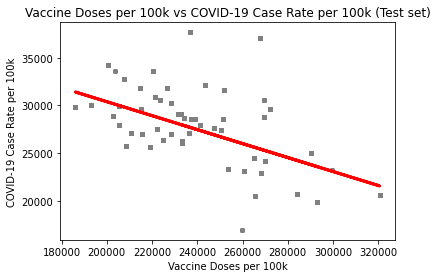

In [41]:
# create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test.title('Vaccine Doses per 100k vs COVID-19 Case Rate per 100k (Test set)')
plot_test.xlabel('Vaccine Doses per 100k')
plot_test.ylabel('COVID-19 Case Rate per 100k')
plot_test.show()

In [42]:
# create objects that contain the model summary statistics

rmse = mean_squared_error(y2_test, y2_predicted) 
r2 = r2_score(y2_test, y2_predicted)

In [43]:
# print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.07313434]]
Mean squared error:  7374559.243053601
R2 score:  0.22549902736215566


The slope is negative, so the relationship is negative. This aligns with my hypothesis that increasing the vaccination dose rate with decrease the cases of COVID-19. The MSE is high at 7374559, so the regression line is not an exact representation of the data. The R2 score of 0.22 represents a poor fit.

In [44]:
y2_predicted

array([[23609.56720963],
       [27964.86357063],
       [30008.96844183],
       ...,
       [26930.59769984],
       [28009.76805689],
       [27964.86357063]])

In [45]:
# create a dataframe comparing the actual and predicted values of Y.

data = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,19871.0,23609.567210
1,26089.0,27964.863571
2,29931.0,30008.968442
3,23095.0,25957.618408
4,34220.0,30351.383433
5,32727.0,29839.150499
6,30938.0,28850.593592
7,26405.0,28563.102492
8,31606.0,26603.394652
9,30083.0,30913.493989


In [46]:
# predict

y2_predicted_train = regression.predict(X2_train) 

In [47]:
rmse = mean_squared_error(y2_train, y2_predicted_train)
r2 = r2_score(y2_train, y2_predicted_train)

In [48]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.07313434]]
Mean squared error:  7206186.2362215035
R2 score:  0.2310924451281111


The values are almost identical to the model, meaning the model was not overdone. The conclusion is that the vaccination rate has a mild effect on the COVID-19 cases, but not enough to coorelate in this analysis.

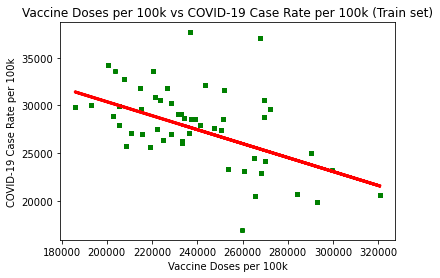

In [49]:
# visualizing the training set results

plot_test = plt
plot_test.scatter(X2_train, y2_train, color='green', s = 15)
plot_test.plot(X2_train, y2_predicted_train, color='red', linewidth =3)
plot_test.title('Vaccine Doses per 100k vs COVID-19 Case Rate per 100k (Train set)')
plot_test.xlabel('Vaccine Doses per 100k')
plot_test.ylabel('COVID-19 Case Rate per 100k')
plot_test.show()